In [2]:
#Libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy
import scipy.stats as scs
import seaborn as sns
import sklearn 
import statsmodels
import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
from itertools import product 
from math import sqrt
from matplotlib import pyplot
from numpy import loadtxt
from pandas import concat
from pandas import DataFrame
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pandas.plotting import scatter_matrix
from scipy.optimize import minimize  
from sklearn import metrics
from sklearn import linear_model as lm
from sklearn import model_selection
from sklearn.datasets import make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from statsmodels.graphics.tsaplots import plot_acf
from tqdm import tqdm_notebook

%matplotlib inline

In [3]:
df = pd.read_csv("model_2018_ST4000DM000.csv")

In [36]:
df.shape

(380078, 105)

In [37]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z3016TK2,ST4000DM000,4000787030016,0,115.0,87117728.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,W300GLSS,ST4000DM000,4000787030016,1,111.0,40108520.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z302SXQ0,ST4000DM000,4000787030016,0,119.0,208926768.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z3025L3F,ST4000DM000,4000787030016,1,111.0,30947064.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z302SW9C,ST4000DM000,4000787030016,0,117.0,137764288.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.tail()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
380073,2018-12-31,S300YCNV,ST4000DM000,4000787030016,0,117.0,144146848.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380074,2018-12-31,Z3029G90,ST4000DM000,4000787030016,0,120.0,238155568.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380075,2018-12-31,Z304VBWQ,ST4000DM000,4000787030016,0,119.0,228301856.0,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380076,2018-12-31,Z3029Z6Q,ST4000DM000,4000787030016,0,113.0,53647936.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380077,2018-12-31,S301PS3E,ST4000DM000,4000787030016,0,119.0,228126392.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=105)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380078 entries, 0 to 380077
Columns: 105 entries, date to smart_255_raw
dtypes: float64(100), int64(2), object(3)
memory usage: 304.5+ MB


In [41]:
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,3.800780e+05,380078.000000,380062.000000,3.800620e+05,0.0,0.0,380062.000000,380062.0,380062.000000,380062.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.000619e+12,0.033141,115.292818,1.219695e+08,NaN,NaN,93.052452,0.0,99.999687,11.378909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.595736e+10,0.179004,3.875825,7.055956e+07,NaN,NaN,2.203416,0.0,0.017692,22.970384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000e+00,0.000000,93.000000,0.000000e+00,NaN,NaN,91.000000,0.0,99.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000787e+12,0.000000,114.000000,6.072650e+07,NaN,NaN,91.000000,0.0,100.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000787e+12,0.000000,117.000000,1.219986e+08,NaN,NaN,92.000000,0.0,100.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000787e+12,0.000000,118.000000,1.830339e+08,NaN,NaN,95.000000,0.0,100.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000787e+12,1.000000,120.000000,2.441403e+08,NaN,NaN,100.000000,0.0,100.000000,1507.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Check Correlations
df[["smart_1_normalized","smart_1_raw"]].corr()

In [42]:
#Check how is an individual column
df["failure"]

0         0
1         1
2         0
3         1
4         0
         ..
380073    0
380074    0
380075    0
380076    0
380077    0
Name: failure, Length: 380078, dtype: int64

In [43]:
#Check repetitions in entries
df["capacity_bytes"].value_counts()

 4000787030016    380062
-1                    16
Name: capacity_bytes, dtype: int64

In [44]:
#I choose only relevant columns
# I chose these columns because other columns I don't chose have no decisive information 
#df= df.iloc[:,4:7]
df=df.iloc[:,[0,1,4,5,9]]

In [45]:
#Check Correlations among features
df.corr()

,failure,smart_1_normalized,smart_3_normalized
failure,1.000000,-0.003109,-0.019891
smart_1_normalized,-0.003109,1.000000,-0.000504
smart_3_normalized,-0.019891,-0.000504,1.000000


In [46]:
df

,date,serial_number,failure,smart_1_normalized,smart_3_normalized
0,2018-01-01,Z3016TK2,0,115.0,96.0
1,2018-01-01,W300GLSS,1,111.0,92.0
2,2018-01-01,Z302SXQ0,0,119.0,94.0
3,2018-01-01,Z3025L3F,1,111.0,92.0
4,2018-01-01,Z302SW9C,0,117.0,92.0
...,...,...,...,...,...
380073,2018-12-31,S300YCNV,0,117.0,97.0
380074,2018-12-31,Z3029G90,0,120.0,92.0
380075,2018-12-31,Z304VBWQ,0,119.0,95.0
380076,2018-12-31,Z3029Z6Q,0,113.0,91.0


In [62]:
df.dtypes

date                   object
serial_number          object
failure                 int64
smart_1_normalized    float64
smart_3_normalized    float64
dtype: object

In [65]:
#df = df.astype({"serial_number": str})

In [49]:
#Correct datatypes of dataset
df= df.infer_objects()

In [50]:
#Check for NAN entries
np.where(np.isnan(df.drop(["date","serial_number"], axis=1)))

(array([ 12438,  12438,  12631,  12631,  12782,  12782, 247698, 247698,
        247837, 247837, 248163, 248163, 248598, 248598, 248899, 248899,
        249795, 249795, 249828, 249828, 250409, 250409, 262478, 262478,
        263229, 263229, 263461, 263461, 263868, 263868, 264796, 264796]),
 array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2]))

In [51]:
#Use Imputer to fill NAN
#imputer = SimpleImputer(strategy="median")
#imputer.fit(df)
#imputer.transform(df)
#imputer.statistics_
df.fillna(df.median(), inplace=True)

In [52]:
#Check imputer strategy
df.median().values

array([  0., 117.,  92.])

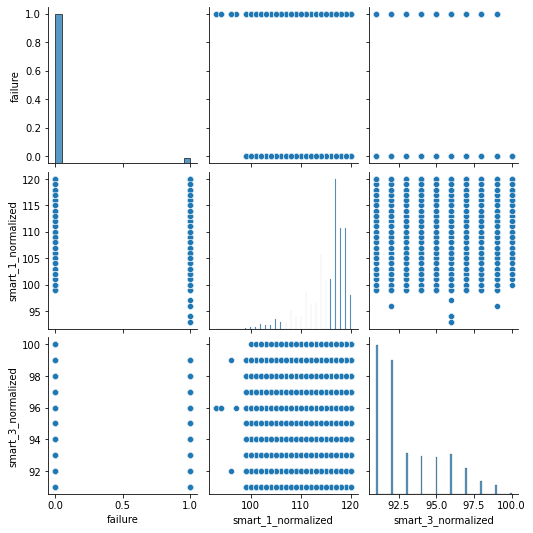

In [53]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'failure'}>,
        <AxesSubplot:title={'center':'smart_1_normalized'}>],
       [<AxesSubplot:title={'center':'smart_3_normalized'}>,
        <AxesSubplot:>]], dtype=object)

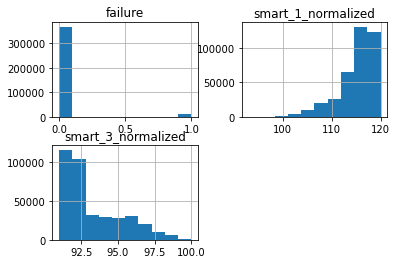

In [54]:
df.hist()

In [55]:
#I choose predictable feature to be failure
#I devide features x and variable y
x=df.drop("failure", axis=1)
y=df["failure"]

In [56]:
y

0         0
1         1
2         0
3         1
4         0
         ..
380073    0
380074    0
380075    0
380076    0
380077    0
Name: failure, Length: 380078, dtype: int64

In [57]:
x

,date,serial_number,smart_1_normalized,smart_3_normalized
0,2018-01-01,Z3016TK2,115.0,96.0
1,2018-01-01,W300GLSS,111.0,92.0
2,2018-01-01,Z302SXQ0,119.0,94.0
3,2018-01-01,Z3025L3F,111.0,92.0
4,2018-01-01,Z302SW9C,117.0,92.0
...,...,...,...,...
380073,2018-12-31,S300YCNV,117.0,97.0
380074,2018-12-31,Z3029G90,120.0,92.0
380075,2018-12-31,Z304VBWQ,119.0,95.0
380076,2018-12-31,Z3029Z6Q,113.0,91.0


In [60]:
#Convert Non numerical attributes to numerical values
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df["serial_number"] = encoder.fit_transform(df["serial_number"])

ValueError: Expected 2D array, got 1D array instead:
array=['Z3016TK2' 'W300GLSS' 'Z302SXQ0' ... 'Z304VBWQ' 'Z3029Z6Q' 'S301PS3E'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
#I split data for ML training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [334]:
#Model LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
#RMSE
m1=np.sqrt(metrics.mean_squared_error(y_test, predictions))
m1

0.18212209026831114

In [341]:
#Model KNeighborsRegressor
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
#RMSE
m2=np.sqrt(metrics.mean_squared_error(y_test, predictions))
m2

0.17895069963369686

In [342]:
l=[m1,m2]
l.index(min(l))

1

In [343]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.966871 (0.000018)
LDA: 0.966871 (0.000018)
KNN: 0.962636 (0.012369)
CART: 0.966890 (0.000020)
NB: 0.966871 (0.000018)
SVM: 0.966883 (0.000020)


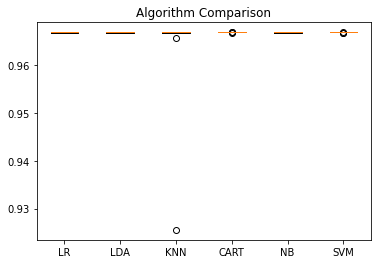

In [344]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()